# Proyek Analisis Data: E-commerce Public
- Nama: Vanessa Novalia
- Email: vanessanovalia508@gmail.com
- Id Dicoding: vanessa_novalia

## Menentukan Pertanyaan Bisnis

1. Kategori produk apa yang paling laris dan paling sedikit terjual?
2. Dari mana asal kota dan negara pelanggan teratas dari segi total pengeluaran?
3. Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
4. Bagaimana tingkat kepuasan pelanggan terhadap pelayanan e-commerce?
5. Metode pembayaran apa yang paling umum digunakan dalam transaksi pada E-commerce?

# Menyiapkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Memuat tabel customers


In [3]:
customers = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### 2. Memuat tabel geolocation

In [4]:
geolocation = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### 3. Memuat tabel orders

In [5]:
orders = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### 4. Memuat tabel order_items

In [6]:
order_it= pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/order_items_dataset.csv')
order_it.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### 5. Memuat tabel order_payments


In [7]:
order_py = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/order_payments_dataset.csv')
order_py.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### 6. Memuat tabel order_reviews

In [8]:
order_review = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/order_reviews_dataset.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### 7. Memuat tabel product

In [9]:
product = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/products_dataset.csv')
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### 8. Memuat tabel product name translation

In [10]:
product_name = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/product_category_name_translation.csv')
product_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


#### 9. Memuat tabel sellers

In [11]:
seller = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding/sellers_dataset.csv')
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

#### Menilai data customers


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan data di atas, sepertinya tidak terdapat masalah pada semua tipe data masing-masing kolom karena telah sesuai. Dan tidak terdapat perbedaan jumlah kolom yang null yang sepertinya menandakan bahwa tidak terdapat nilai null pada data customers. Untuk lebih jelasnya kita akan cek di bawah ini:

In [13]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Ternyata benar bahwa tidak terdapat nilai null pada data customers. Selanjutnya kita akan melakukan pengecekan pada data duplikat

In [14]:
customers.duplicated().sum()

0

Ternyata pada data customers juga tidak terdapat data duplikat. Selanjutnya kita akan memeriksa parameter statistik dari kolom numerik.

In [15]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Seperti yang bisa kita lihat, kolom numerik pada tabel customers hanya terdapat 1 yaitu zip code prefix, yang dalam kasus ini menurut saya tidak terlalu penting dan tidak mempengaruhi hal lain. Oleh karena itu saya tidak akan melakukan tindak lanjutan dari hasil describe di atas.

#### Menilai data geolocation


In [16]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [122]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [17]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah duplikasi pada data geolocation : ", geolocation.duplicated().sum())

Jumlah duplikasi pada data geolocation :  261831


Berdasarkan informasi di atas, terdapat banyak duplikasi pada data geolocation yaitu sebanyak 261.831 dari total 1.000.163 data. Namun data duplikasi ini tidak perlu dihapus karna kemungkinan data pada kolom 'geolocation_city' dan 'geolocation_state' memiliki value tertinggi yaitu SP dan Sao Paulo

In [19]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Memuat data orders


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan informasi di atas, dapat terlihat terdapat 3 kolom null yaitu:
- order_approved_at : waktu ketika pesanan disetujui.
- order_delivered_carrier_date : waktu saat pesanan dikirimkan melalui ekspedisi.
- order_delivered_customer_date : waktu saat pesanan diterima oleh pelanggan.

Selain terdapat nilai null ketiga kolom diatas juga bertipe data object, yang seharusnya bertipe data datetime. Hal ini sama halnya dengan kolom order_estimated_delivery_date yang juga memiliki kesalahan tipe data.

Namun nilai null disini bisa disebabkan karena memang pada status order pesanan masih on proses sehingga kolom seperti order_delivered_customer_date itu masih kosong atau belum tau tanggalnya.

In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Berdasarkan data di atas diketahui bahwa tidak terdapat duplikasi pada data orders.

Seperti yang kita ketahui dari info yang kita dapatkan bahwa semua kolom yang ada di tabel order bertipe data object sehingga kurang tepat jika kita ingin memeriksa ringkasan parameter statistik karena bukan bertipe data numerik.

#### Memuat data order_items


In [23]:
order_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Dari informasi di atas menandakan bahwa tidak terdapat nilai null pada tabel order_items.

Namun terdapat kesalahan tipe data kolom 'shipping_limit_date' yang bertipe data object, seharusnya tipe datanya lebih tepat datetime.


In [25]:
order_it.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
print("Jumlah duplikasi: ",order_it.duplicated().sum())
order_it.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Berdasarkan informasi di atas, tidak ditemukan adanya duplikasi pada tabel order_items.

#### Memuat data order_payments

In [27]:
order_py.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Dari informasi di atas menandakan bahwa tidak terdapat nilai null pada tabel order_payments

In [28]:
order_py.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [29]:
print("Jumlah duplikasi: ",order_py.duplicated().sum())
order_py.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Berdasarkan informasi di atas, tidak ditemukan adanya duplikasi pada tabel order_payments.

#### Memuat data order_reviews

In [30]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Dari informasi di atas, dapat diketahui bahwa terdapat 2 kolom yang memilliki nilai null yaitu:
- review_comment_title
- review_comment_message

Selain itu, terdapat kesalahan tipe data pada kolom review_creation date dan review_answer_timestamp yang seharusnya bertipe data datetime bukan object

In [31]:
order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Melihat dari jumlah nilai yang kosong lebih dari 50% kedua kolom ini akan saya tindaklanjuti pada tahap data cleaning nantinya.


In [32]:
print("Jumlah duplikasi: ",order_review.duplicated().sum())
order_review.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Berdasarkan informasi di atas, dapat diketahui bahwa tidak terdapat data duplikat pada kolom data order_review.

Dan jika dilihat dari parameter statisik numeriknya yaitu review_score, tidak terdapat keanehan karena rentang score berada di 1 - 5 sehingga nilai min = 1 dan max = 5

#### Memuat data products

In [33]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
product.shape

(32951, 9)

Berdasarkan informasi di atas, dapat diketahui bahwa tabel product memiliki banyak kolom yang berisi null karena hanya product_id yang tidak memiliki null.

Untuk lebih jelasnya kita akan lihat berapa banyak null dari masing-masing kolom, yang akan dilihat di bawah ini:


In [35]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
print("Jumlah duplikasi: ",product.duplicated().sum())
product.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Berdasarkan informasi di atas, diketahui bahwa tidak terdapat kolom yang duplikat pada data products

#### Memuat data product name translation

In [37]:
product_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Berdasarkan hasil diatas, dapat dilihat bahwa tidak terdapat kesalahan pada kedua kolom, karena tidak terdapat nilai null serta tidak terdapat kesalahan tipe data.

In [38]:
product_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
print("Jumlah duplikasi: ",product_name.duplicated().sum())
product_name.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Berdasarkan hasil di atas, bisa terlihat bahwa tidak terdapat masalah pada data product category name translation.

#### Memuat data sellers

In [40]:
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Dari data diatas, diketahui bahwa tidak terdapat nilai null pada data seller

In [41]:
seller.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [42]:
print("Jumlah duplikasi: ",seller.duplicated().sum())
seller.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Berdasarkan informasi di atas, dapat terlihat bahwa data seller tidak memiliki data yang duplikat.

KESIMPULAN DARI ASSESSING DATA:

- customers : tidak ada yang perlu diperbaiki
- geolocation : banyak duplikasi, namun dalam kasus ini tidak perlu dilakukan penghapusan data, karena hal ini menandakan geolocation yang memiliki value tertinggi di salah satu state dan city.
- orders : terdapat nilai null dan kesalahan tipe data yang harusnya datetime
- order items :tidak ada yang perlu diperbaiki
- order payment : tidak ada yang perlu diperbaiki
- order review : mengatasi missing value pada review_comment_title dan review_comment_message yang memiliki nilai null > 50% serta kesalahan tipe data
- products : semua kolom memiliki nilai null kecuali kolom product_id
- sellers : tidak ada yang perlu diperbaiki


## Cleaning Data

#### Membersihkan data orders

Pertama-tama kita akan mengubah tipe data object menjadi datetime


In [43]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in date_columns:
  orders[column] = pd.to_datetime(orders[column])

print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


Sekarang beberapa kolom yang sebelumnya object telah berubah menjadi datetime

In [44]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)



Berdasarkan status order di atas, dapat disimpulkan bahwa data null yang ada pada kolom 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date' berkemungkinan dikarenakan status pesanan belum delivered. Kecuali data yang delivered yang seharusnya tidak boleh kosong, karena semua proses sudah terselesaikan. Sehingga saya tidak melakukan cleaning lebih lanjut untuk hal ini agar data tetap akurat.

#### Membersihkan data order items

In [24]:
order_it['shipping_limit_date'] = pd.to_datetime(order_it['shipping_limit_date'])

In [123]:
order_it.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Sekarang kolom 'shipping_limit_date' sudah sesuai dengan tipedata seharusnya yakni datetime.

#### Membersihkan data order review

In [49]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Karena banyak missing value yang terdapat pada title dan message review, jika hal ini kita atasi dengan melakukan penghapusan menurut saya hal ini kurang tepat walaupun missing valuenya lebih dari 50%, karena akan mempengaruhi jumlah review score dalam jumlah yang signifikan. Sehingga saya akan mengatasi hal ini dengan mengisinya dengan:
- judul : 'no_title'
- pesan : 'no message'

In [50]:
order_review['review_comment_title'].fillna(value="No title", inplace=True)
order_review['review_comment_message'].fillna(value="No comment", inplace=True)

In [51]:
order_review.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Sekarang semua data missing value sudah bersih

In [52]:
or_datetime = ['review_creation_date', 'review_answer_timestamp']

for column in or_datetime:
  order_review[column] = pd.to_datetime(order_review[column])

order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Sekarang, kesalahan tipe data juga sudah teratasi

## Exploratory Data Analysis (EDA)

### Explore customers

In [56]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [57]:
customers.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

Berdasarkan hasil di atas, dapat dilihat bahwa data customer paling banyak berasal dari kota 'Sao Paulo'

In [58]:
customers.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Berdasarkan state atau negara, customer paling banyak berasal dari state 'SP'

### Explore orders

In [59]:
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
70919,5ff05cd5557e3cc10ba2ef800f2b8da6,dfe414a11599a003b95ff5ccffb8627a,invoiced,2017-05-10 18:42:38,2017-05-10 18:55:12,NaT,NaT,2017-07-03
79701,29867728eef5282c4181cbed99246268,3306b138f542d4f9ad7d9b59ffe3b83e,delivered,2018-07-15 15:34:42,2018-07-17 07:31:35,2018-07-18 13:28:00,2018-07-24 18:32:05,2018-08-10
44200,866314550f6d7a55c82917d9b4463e1f,9009e9f0ac28d47bd18433d82aa028d6,delivered,2017-11-16 14:55:04,2017-11-18 02:31:11,2018-01-21 16:12:17,2018-01-25 19:38:35,2017-12-13
43614,5e24ecfdf90a8dfceb3cd8ed37db5c26,dd7a9d920cff1f70c5d4bb121ad11608,delivered,2018-04-30 23:38:41,2018-05-01 03:53:46,2018-05-07 07:11:00,2018-05-11 22:08:54,2018-06-06
383,f09942b1e1419e69f7509158f2a9c1d6,b40a130a36dc28cdbdabe856f1eee283,delivered,2017-12-16 13:51:18,2017-12-16 13:58:23,2017-12-19 21:04:31,2017-12-23 16:21:44,2018-01-05


Saya akan menghitung delivery time atau waktu pengiriman, yang dihitung dari selisih waktu antara 'order_purchase_timestamp' (waktu pemesanan) sampai 'order_delivered_customer_date (waktu pesanan diterima customer).

Hal ini akan memberikan gambaran tentang berapa lama waktu yang diperlukan dari saat customer melakukan pesanan hingga menerima pesanan.

In [60]:
delivery_time =  orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time"] = round(delivery_time/86400)

In [61]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0


In [62]:
orders.describe(include="all")

<ipython-input-62-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-62-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-62-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-62-53760f63e7b4>:1: FutureWarning: Treat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,NaN
freq,1,1,96478,3,9,47,3,522,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.517548
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.550516
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


Berdasarkan hasil describe diatas, dapat terlihat bahwa rata-rata lamanya pengiriman produk sekitar 12 hari.

In [63]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_time                  96476 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


In [64]:
customer_id_in_orders =  orders.customer_id.tolist()
customers["status"] = customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders else "Non Active")
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
56709,b064912c102c176d5569d59a78632f84,79b372d20104692646f638bc3c695561,3650,sao paulo,SP,Active
83826,23ac056687fd805b997f44076a13ba55,fccb5e809edbbe3512ddb842e66274da,18480,itaporanga,SP,Active
11464,a9d4d5f1e35e1255228f972bf67c9a4d,cea30ba8e28354a1ef8ecff28f8c7b62,27281,volta redonda,RJ,Active
73475,ada97234c297d1fcdf68fc5d72f90808,fcaba43cfd594b9a6e1389bcbd33d5bd,24754,sao goncalo,RJ,Active
66988,1375316ebc7ef4583b565e6cffa8c717,755b01b2c86cb92e6b25d45f9fa8c238,12248,sao jose dos campos,SP,Active


In [65]:
customers.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

Berdasarkan hasil di atas, dapat disimpulkan bahwa semua customer pada e-commerce kita semuanya merupakan customer yang aktif, yang menandakan setidaknya pernah melakukan order sekali.

### Explore order items



In [66]:
order_it.sort_values(by='price', ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


In [67]:
# Menganalisis total penghasilan untuk setiap penjual
total_revenue_by_seller = order_it.groupby('seller_id')['price'].sum().reset_index()

# Mengurutkan seller berdasarkan penghasilan dari yang tertinggi ke terendah
sorted_sellers = total_revenue_by_seller.sort_values(by='price', ascending=False)

print("Urutan Seller berdasarkan Penghasilan:")
print(sorted_sellers)

Urutan Seller berdasarkan Penghasilan:
                             seller_id      price
857   4869f7a5dfa277a7dca6462dcf3b52b2  229472.63
1013  53243585a1d6dc2643021fd1853d8905  222776.05
881   4a3ca9315b744ce9f8e9374361493884  200472.92
3024  fa1c13f2614d7b5c4749cbc52fecda94  194042.03
1535  7c67e1448b00f6e969d365cea6b010ab  187923.89
...                                ...        ...
627   34aefe746cd81b7f3b23253ea28bef39       8.00
1370  702835e4b785b67a084280efca355756       7.60
373   1fa2d3def6adfa70e58c276bb64fe5bb       6.90
1465  77128dec4bec4878c37ab7d6169d6f26       6.50
2519  cf6f6bc4df3999b9c6440f124fb2f687       3.50

[3095 rows x 2 columns]


In [68]:
# Menggabungkan informasi seller dengan total penghasilan
best_seller = pd.merge(total_revenue_by_seller, seller, on='seller_id')

# Mengurutkan seller berdasarkan penghasilan dari yang tertinggi ke terendah
sorted_sellers = best_seller.sort_values(by='price', ascending=False)

# Menampilkan seluruh DataFrame yang sudah diurutkan
print("Daftar Kota Seller berdasarkan Penghasilan (dari besar ke kecil):")
print(sorted_sellers[['seller_city', 'price']])

Daftar Kota Seller berdasarkan Penghasilan (dari besar ke kecil):
           seller_city      price
857            guariba  229472.63
1013  lauro de freitas  222776.05
881           ibitinga  200472.92
3024            sumare  194042.03
1535   itaquaquecetuba  187923.89
...                ...        ...
627           curitiba       8.00
1370      juiz de fora       7.60
373          sao paulo       6.90
1465         sao paulo       6.50
2519         sao paulo       3.50

[3095 rows x 2 columns]


Berdasarkan hasil di atas, dapat terlihat bahwa kota seller yang memiliki hasil penjualan paling banyak adalah dari kota Guariba, disusul oleh Lauro De Freitas dan Ibitinga.

### Explore payment

In [71]:
order_py.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [72]:
order_py.groupby(by="payment_type").order_id.nunique().sort_values(ascending =False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [73]:
# Gabungkan DataFrame order dan payment
merged_data = pd.merge(orders, order_py, on='order_id')

customer_payment_info = merged_data.groupby('customer_id').agg(
    total_payment=('payment_value', 'sum'),
    order_count=('order_id', 'nunique')
).reset_index()

print("Informasi Pembayaran dan Jumlah Order per Customer:")
print(customer_payment_info)

Informasi Pembayaran dan Jumlah Order per Customer:
                            customer_id  total_payment  order_count
0      00012a2ce6f8dcda20d059ce98491703         114.74            1
1      000161a058600d5901f007fab4c27140          67.41            1
2      0001fd6190edaaf884bcaf3d49edf079         195.42            1
3      0002414f95344307404f0ace7a26f1d5         179.35            1
4      000379cdec625522490c315e70c7a9fb         107.01            1
...                                 ...            ...          ...
99435  fffecc9f79fd8c764f843e9951b11341          81.36            1
99436  fffeda5b6d849fbd39689bb92087f431          63.13            1
99437  ffff42319e9b2d713724ae527742af25         214.13            1
99438  ffffa3172527f765de70084a7e53aae8          45.50            1
99439  ffffe8b65bbe3087b653a978c870db99          18.37            1

[99440 rows x 3 columns]


In [74]:
# Mengurutkan DataFrame berdasarkan total payment secara descending
sorted_customers = customer_payment_info.sort_values(by='total_payment', ascending=False)

# Menampilkan customer dengan total payment terbanyak (misalnya, 5 customer pertama)
top_customers = sorted_customers.head(5)

# Tampilkan hasilnya
print("Customer dengan Total Pembayaran Terbanyak:")
print(top_customers)

Customer dengan Total Pembayaran Terbanyak:
                            customer_id  total_payment  order_count
8546   1617b1357756262bfa56ab541c47bc16       13664.08            1
91984  ec5b2ba62e574342386871631fafd3fc        7274.88            1
77521  c6e2731c5b391845f6800c97401a43a9        6929.31            1
95123  f48d464a0baaea338cb25f816991ab1f        6922.21            1
24771  3fd6777bbce08a352fddd04e4a7cc8f6        6726.66            1


Berdasarkan analisis diatas, saya ingin melihat customer mana yang paling loyal dengan total payment dan order terbanyak.

### Explore order review

In [75]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No title,No comment,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No title,No comment,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No title,No comment,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [76]:
review_rating = order_review.groupby(by="review_score").order_id.nunique().sort_values(ascending =False)
review_rating

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

Selanjutnya saya akan menghitung rata-rata rating produk untuk setiap kategori produk untuk melihat produk mana yang memiliki best rating dari customer.

In [77]:
merged_data = pd.merge(order_review, order_it, on='order_id')
merged_data = pd.merge(merged_data, product, on='product_id')

# Langkah 2: Hitung rata-rata review penilaian untuk setiap kategori produk
average_review_by_category = merged_data.groupby('product_category_name')['review_score'].mean().reset_index()

# Langkah 3: Urutkan hasilnya
sorted_categories = average_review_by_category.sort_values(by='review_score', ascending=False)

# Tampilkan hasilnya
print("Rata-rata Review Penilaian per Kategori Produk:")
print(sorted_categories)

Rata-rata Review Penilaian per Kategori Produk:
                            product_category_name  review_score
17                              cds_dvds_musicais      4.642857
37                  fashion_roupa_infanto_juvenil      4.500000
48                         livros_interesse_geral      4.446266
22             construcao_ferramentas_ferramentas      4.444444
41                                         flores      4.419355
..                                            ...           ...
55                              moveis_escritorio      3.493183
60                                       pc_gamer      3.333333
65  portateis_cozinha_e_preparadores_de_alimentos      3.266667
42                                fraldas_higiene      3.256410
67                             seguros_e_servicos      2.500000

[73 rows x 2 columns]


Selanjutnya saya akan mengantikan nama kategori produk dengan terjemahannya

In [78]:
merged_categories_with_translation = pd.merge(sorted_categories, product_name, on='product_category_name', how='left')

# Langkah 2: Gantilah nilai pada kolom product_category_name dengan nilai dari kolom product_category_name_english
merged_categories_with_translation['product_category_name'] = merged_categories_with_translation['product_category_name_english']

# Langkah 3: Hapus kolom product_category_name_english jika tidak diperlukan lagi
merged_categories_with_translation = merged_categories_with_translation.drop(columns=['product_category_name_english'])

# Tampilkan hasilnya
print("Rata-rata Review Penilaian per Kategori Produk (dengan Terjemahan):")
print(merged_categories_with_translation)

Rata-rata Review Penilaian per Kategori Produk (dengan Terjemahan):
        product_category_name  review_score
0           cds_dvds_musicals      4.642857
1   fashion_childrens_clothes      4.500000
2      books_general_interest      4.446266
3     costruction_tools_tools      4.444444
4                     flowers      4.419355
..                        ...           ...
68           office_furniture      3.493183
69                        NaN      3.333333
70                        NaN      3.266667
71        diapers_and_hygiene      3.256410
72      security_and_services      2.500000

[73 rows x 2 columns]


Berdasarkan data di atas, terdapat nilai NaN karena product_category_name_translation untuk 'pc_gamer' dan 'portateis_cozinha_e_preparadores_de_alimentos'.

Dan untuk rating tertinggi adalah pada kategori produk **cds_dvds_musicals**

### Merged data customers dan orders


In [79]:
customers_order = pd.merge(
    left = orders,
    right = customers,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
customers_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


#### Jumlah order berdasarkan city

In [80]:
customers_order.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


Berdasarkan hasil di atas, diketahui bahwa kota Sao Paulo dan Rio de Janeiro merupakan dua kota yang memiliki jumlah order terbanyak.

#### Jumlah order berdasarkan state

In [81]:
customers_order.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Berdasarkan hasil diatas, diketahui bahwa SP merupakan state yang paling banyak melakukan order pada e-commerce kita

### Merged data order_review dan payment


In [82]:
payment_review = pd.merge(
    left = order_py,
    right = order_review,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
payment_review.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No title,No comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No title,No comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No title,No comment,2017-12-21,2017-12-22 01:10:39


In [83]:
payment_review.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [84]:
payment_review.sort_values(by='payment_value', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No title,No comment,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,No comment,2018-08-24,2018-08-25 02:24:54


In [85]:
payment_review.groupby(by='payment_type').agg({
    "order_id" : 'nunique',
    "payment_value" : ["min","max", "sum"]
})

order_id payment_value                       
              nunique           min       max          sum
payment_type                                              
boleto          19784         11.62   7274.88   2886679.49
credit_card     76505          0.01  13664.08  12594157.13
debit_card       1528         13.38   4445.50    218721.13
not_defined         3          0.00      0.00         0.00
voucher          3866          0.00   3184.34    381862.99

### Merged data customer_order & payment_review

In [86]:
customer_df = pd.merge(
    left = customers_order,
    right = payment_review,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,No title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,No title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,No title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,No title,No comment,2018-08-18,2018-08-22 19:07:58


### Merged data order_items dan seller

In [87]:
item_seller = pd.merge(
    left = order_it,
    right = seller,
    how = 'left',
    left_on = 'seller_id',
    right_on = 'seller_id'
)
item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [88]:
item_seller.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).head(5)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: seller_id, dtype: int64

In [89]:
item_seller.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False).head(5)


seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: seller_id, dtype: int64

Berdasarkan hasil di atas, dapat terlihat bahwa asal kota dan negara seller terbanyak adalah 'Sao Paulo' dan 'SP' yang sama halnya dengan customer yang telah kita analisis sebelumnya.

### Merged product dan product_name_translation

In [90]:
product_df = pd.merge(
    left = product,
    right = product_name,
    how = 'left',
    left_on = 'product_category_name',
    right_on = 'product_category_name'
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [91]:
product_df.groupby(by='product_category_name').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [92]:
product_df.groupby(by='product_category_name_english').product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

### Merged data item_seller & product_df

In [93]:
seller_product = pd.merge(
    left = product_df,
    right = item_seller,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)
seller_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [94]:
seller_product.groupby(by='product_category_name_english').order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               9417
health_beauty                8836
sports_leisure               7720
computers_accessories        6689
furniture_decor              6449
                             ... 
arts_and_craftmanship          23
la_cuisine                     13
cds_dvds_musicals              12
fashion_childrens_clothes       8
security_and_services           2
Name: order_id, Length: 71, dtype: int64

### **Merged ALL DATA**

In [95]:
all_df = pd.merge(
    left = customer_df,
    right = seller_product,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP


In [96]:
all_df.shape

(119143, 42)

In [97]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   delivery_time                  115722 non-null  float64       
 9   customer_unique_id             119143 non-null  object        
 10  customer_zip_code_prefix       119143 non-null  int64         
 11  

Convert dataset

In [98]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling laris dan paling sedikit terjual?

In [101]:
sum_order_product = all_df.groupby('product_category_name_english')['order_id'].count().reset_index()
sum_order_product = sum_order_product.rename(columns = {'order_id' : 'Total Order'})
sum_order_product = sum_order_product.sort_values(by='Total Order', ascending=False)
sum_order_product.head(5)

,product_category_name_english,Total Order
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


In [102]:
sum_order_product.tail(5)

,product_category_name_english,Total Order
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8
61,security_and_services,2


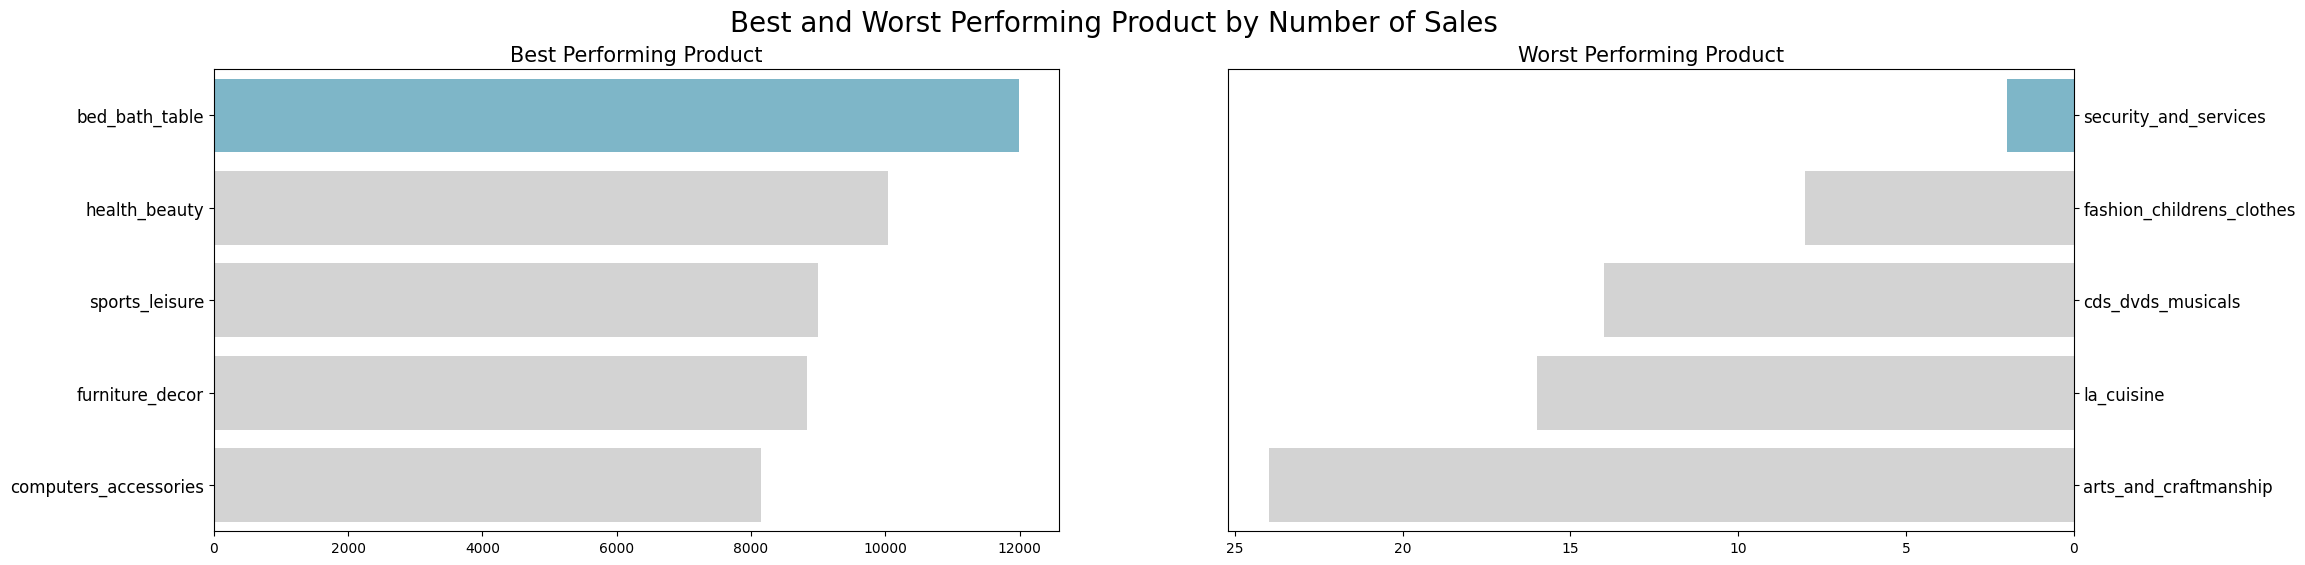

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="Total Order", y="product_category_name_english", data=sum_order_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="Total Order", y="product_category_name_english", data=sum_order_product.sort_values(by="Total Order", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2: Dari mana asal kota dan negara pelanggan teratas dari segi total pengeluaran?

In [104]:
sum_order_city_cus = all_df.groupby('customer_city').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

sum_order_city_cus = sum_order_city_cus.rename(columns={'order_id': 'Total Order'})

sum_order_city_cus = sum_order_city_cus.sort_values(by='Total Order', ascending=False)
sum_order_city_cus

,customer_city,Total Order,payment_value
3597,sao paulo,18875,2901789.67
3155,rio de janeiro,8311,1581736.07
453,belo horizonte,3299,509165.81
558,brasilia,2500,435971.02
1143,curitiba,1827,333582.09
...,...,...,...
3245,salto grande,1,674.34
1611,icaraima,1,43.95
1612,icatu,1,892.90
3242,salto do itarare,1,276.47


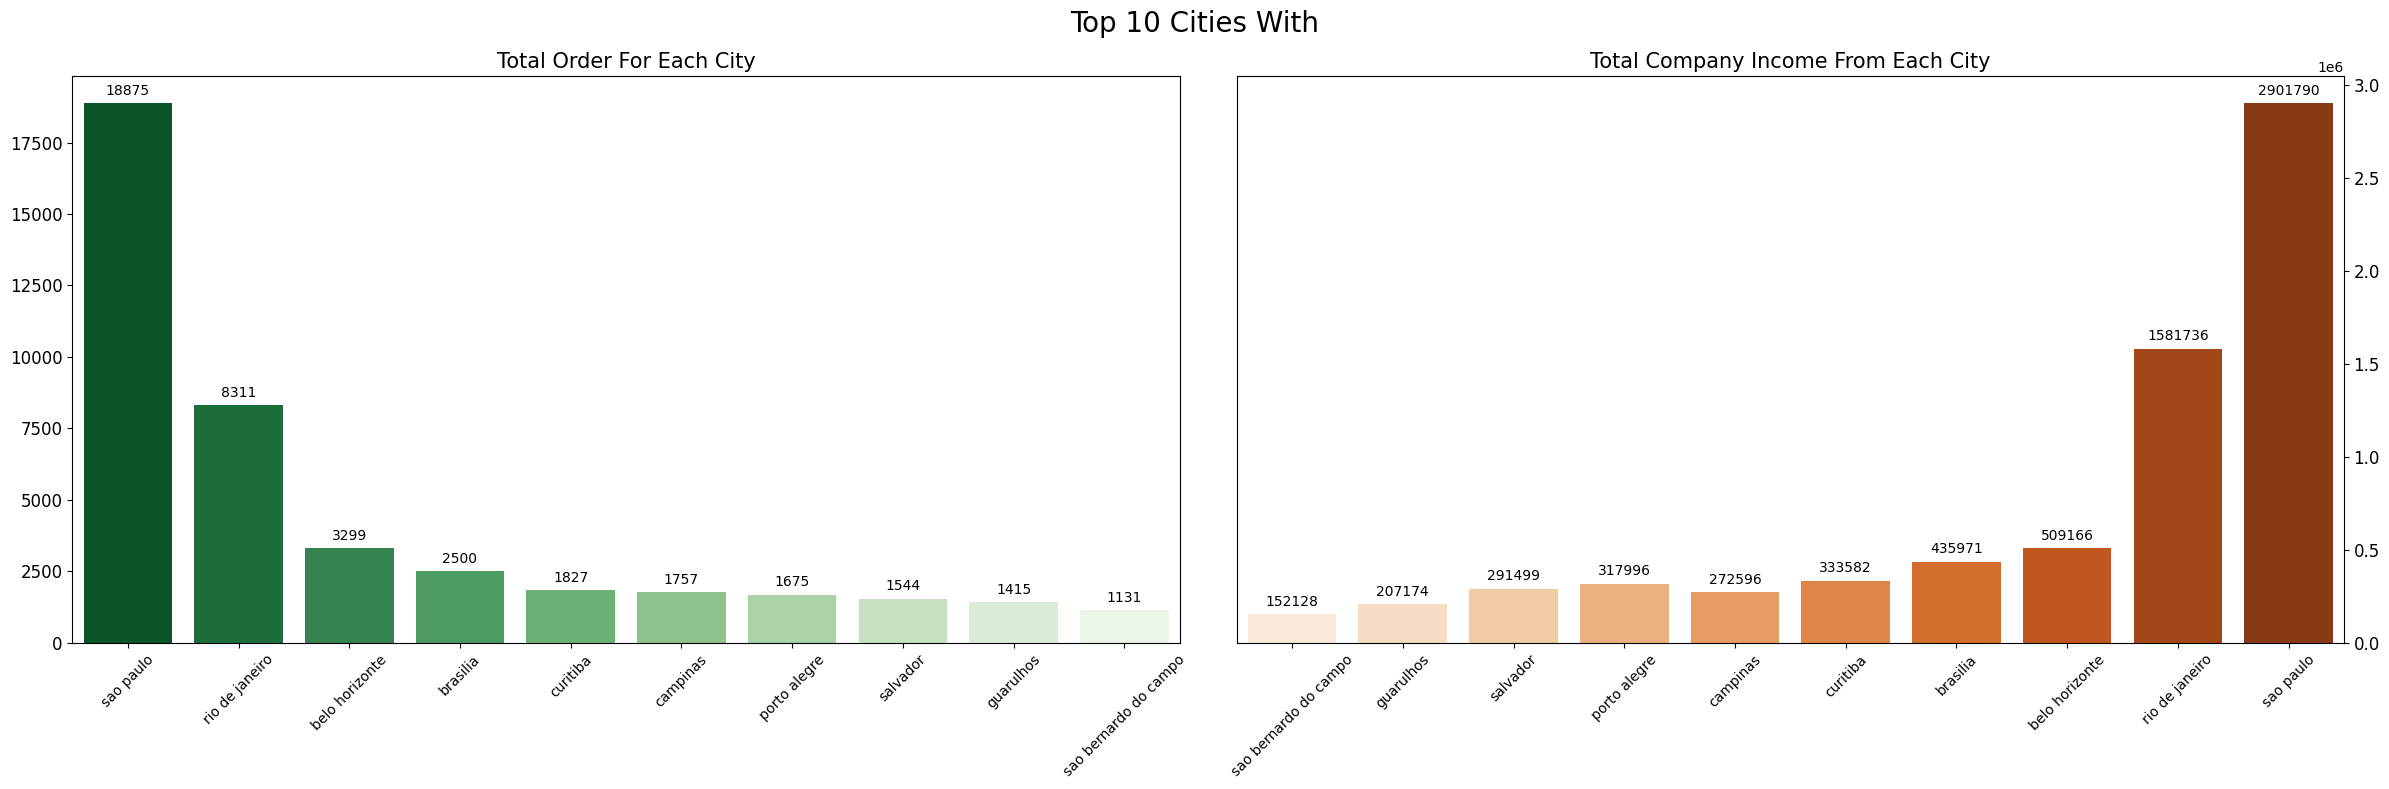

In [105]:
# Membuat dua sumbu y
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Plot Total Order pada sumbu kiri
order_plot = sns.barplot(x="customer_city", y="Total Order", data=sum_order_city_cus.head(10), palette="Greens_r", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total Order For Each City", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', rotation=45, labelsize=10)

# Menambahkan label nilai di atas bar pada sumbu kiri
for p in order_plot.patches:
    order_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points')

# Plot Total Payment pada sumbu kanan
payment_plot = sns.barplot(x="customer_city", y="payment_value", data=sum_order_city_cus.head(10), palette="Oranges_r", ax=ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Total Company Income From Each City", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', rotation=45, labelsize=10)

# Menambahkan label nilai di atas bar pada sumbu kanan
for p in payment_plot.patches:
    payment_plot.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center',
                          xytext = (0, 9),
                          textcoords = 'offset points')

plt.suptitle("Top 10 Cities With", fontsize=20)
plt.tight_layout()
plt.show()

In [106]:
sum_order_state_cus = all_df.groupby('customer_state').agg({
    'order_id': 'count',
    'payment_value': 'sum'
}).reset_index()

sum_order_state_cus = sum_order_state_cus.rename(columns={'order_id': 'Total Order'})

sum_order_state_cus = sum_order_state_cus.sort_values(by='Total Order', ascending=False)
sum_order_state_cus

,customer_state,Total Order,payment_value
25,SP,50265,7726078.35
18,RJ,15518,2795615.67
10,MG,13819,2351221.09
22,RS,6573,1160175.66
17,PR,6043,1079795.49
23,SC,4345,801276.45
4,BA,4091,805070.98
6,DF,2516,438095.32
8,GO,2466,520481.65
7,ES,2360,408611.64


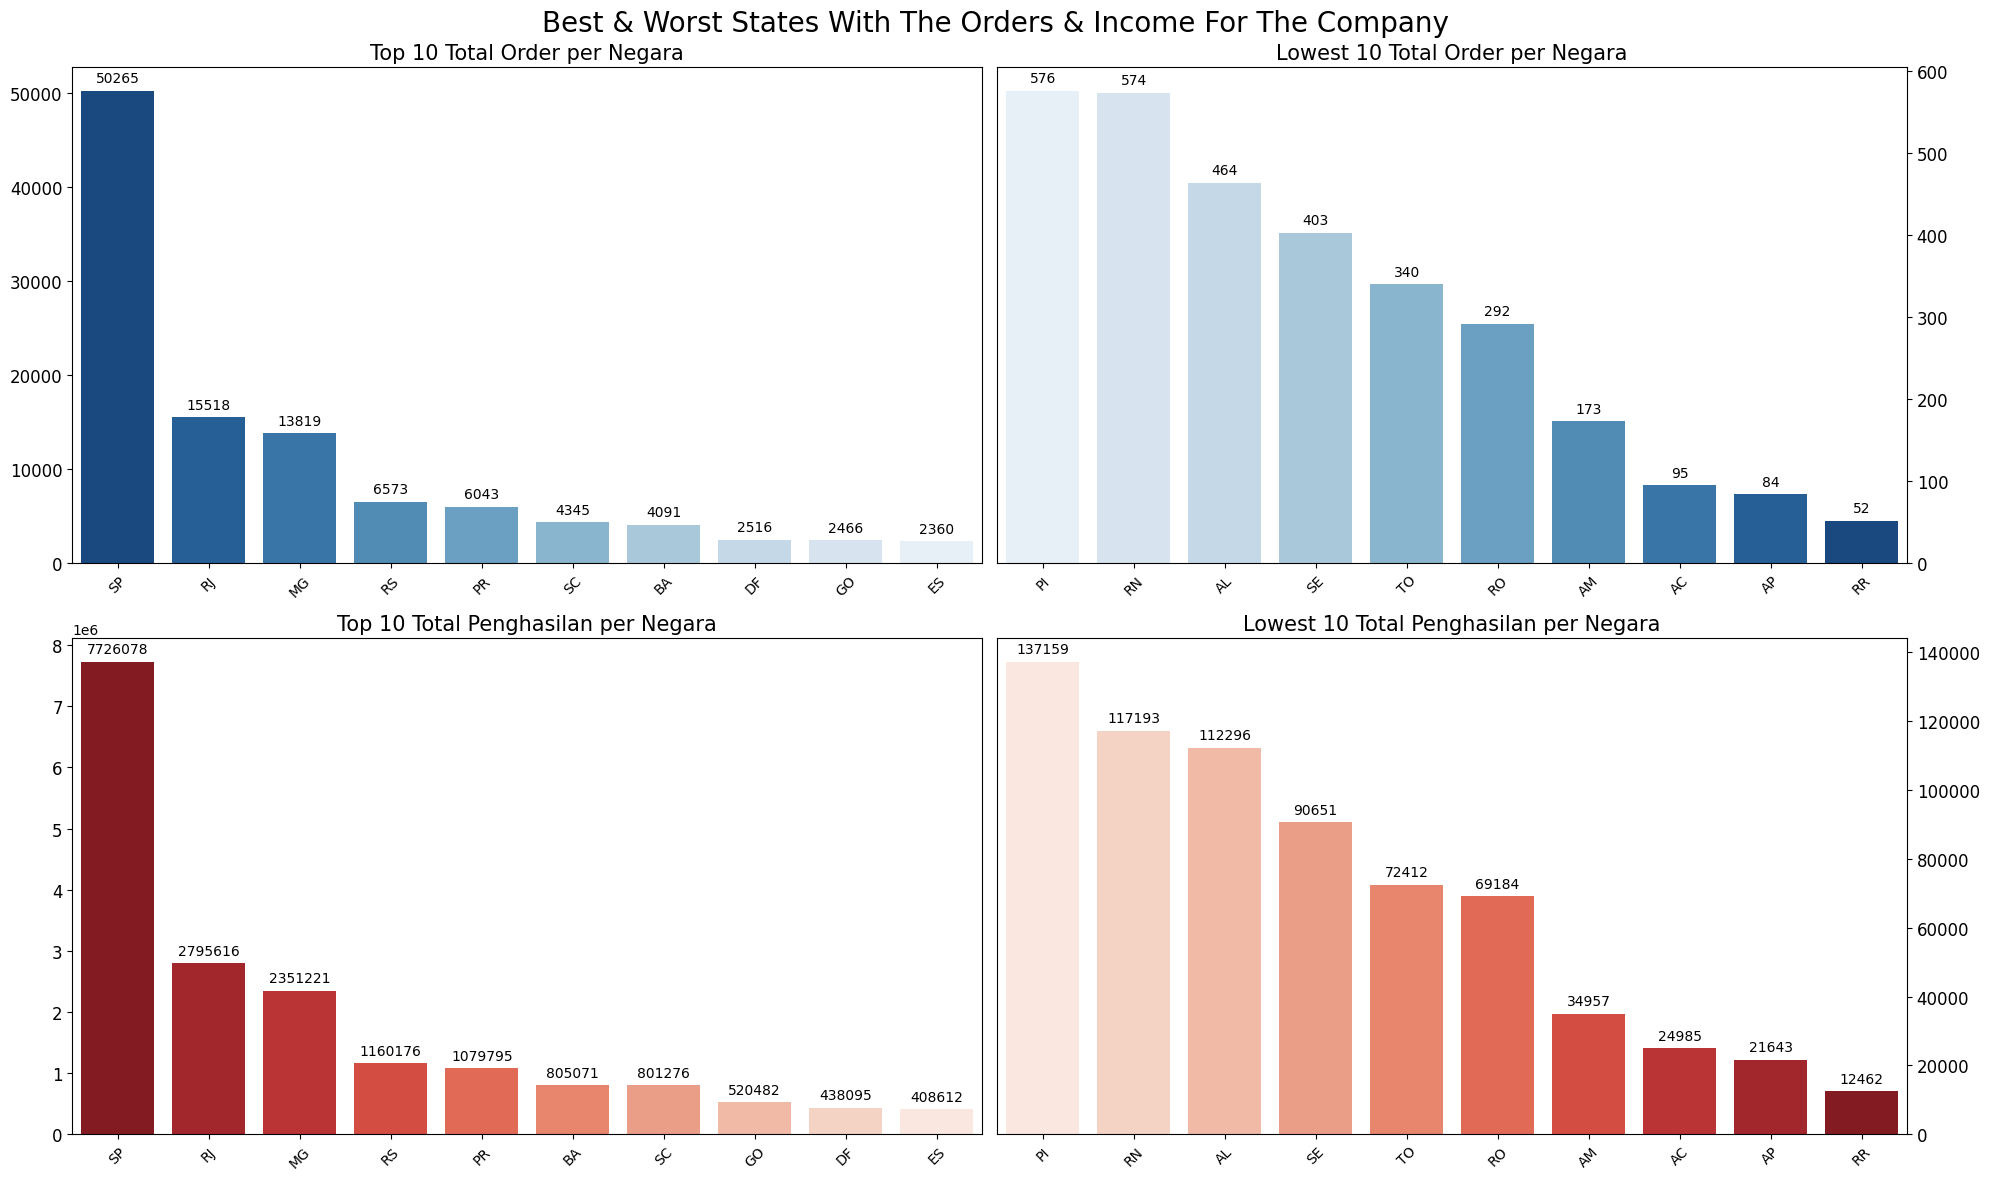

In [107]:
# Membuat subplot dengan grid 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Menyaring data untuk Total Order
top_10_order = sum_order_state_cus.nlargest(10, 'Total Order')
lowest_10_order = sum_order_state_cus.nsmallest(10, 'Total Order')

# Plot Top 10 Total Order pada subplot kiri atas
order_plot = sns.barplot(x='customer_state', y='Total Order', data=top_10_order, palette="Blues_r", ax=axes[0, 0])
axes[0, 0].set_ylabel(None)
axes[0, 0].set_xlabel(None)
axes[0, 0].set_title("Top 10 Total Order per Negara", loc="center", fontsize=15)
axes[0, 0].tick_params(axis='y', labelsize=12)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=10)

# Menambahkan label pada bar Top 10 Total Order
for p in order_plot.patches:
    order_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

# Plot Lowest 10 Total Order pada subplot kanan atas
lowest_order_plot = sns.barplot(x='customer_state', y='Total Order', data=lowest_10_order, palette="Blues_r", ax=axes[0, 1])
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)
axes[0, 1].invert_xaxis()
axes[0, 1].yaxis.set_label_position("right")
axes[0, 1].yaxis.tick_right()
axes[0, 1].set_title("Lowest 10 Total Order per Negara", loc="center", fontsize=15)
axes[0, 1].tick_params(axis='y', labelsize=12)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)

# Menambahkan label pada bar Lowest 10 Total Order
for p in lowest_order_plot.patches:
    lowest_order_plot.annotate(format(p.get_height(), '.0f'),
                               (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center',
                               xytext=(0, 9),
                               textcoords='offset points')

# Menyaring data untuk Total Penghasilan
top_10_payment = sum_order_state_cus.nlargest(10, 'payment_value')
lowest_10_payment = sum_order_state_cus.nsmallest(10, 'payment_value')

# Plot Top 10 Total Penghasilan pada subplot kiri bawah
payment_plot = sns.barplot(x='customer_state', y='payment_value', data=top_10_payment, palette='Reds_r', ax=axes[1, 0])
axes[1, 0].set_ylabel(None)
axes[1, 0].set_xlabel(None)
axes[1, 0].set_title("Top 10 Total Penghasilan per Negara", loc="center", fontsize=15)
axes[1, 0].tick_params(axis='y', labelsize=12)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=10)

# Menambahkan label pada bar Top 10 Total Penghasilan
for p in payment_plot.patches:
    payment_plot.annotate(format(p.get_height(), '.0f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 9),
                          textcoords='offset points')

# Plot Lowest 10 Total Penghasilan pada subplot kanan bawah
lowest_payment_plot = sns.barplot(x='customer_state', y='payment_value', data=lowest_10_payment, palette='Reds_r', ax=axes[1, 1])
axes[1, 1].set_xlabel(None)
axes[1, 1].set_ylabel(None)
axes[1, 1].invert_xaxis()
axes[1, 1].yaxis.set_label_position("right")
axes[1, 1].yaxis.tick_right()
axes[1, 1].set_title("Lowest 10 Total Penghasilan per Negara", loc="center", fontsize=15)
axes[1, 1].tick_params(axis='y', labelsize=12)
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=10)
for p in lowest_payment_plot.patches:
  lowest_payment_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 9),
                              textcoords='offset points')

plt.suptitle("Best & Worst States With The Orders & Income For The Company", fontsize=20)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [108]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df.head()

,order_approved_at,order_count,revenue
0,September,1,0.00
1,October,320,75985.54
2,November,0,0.00
3,December,1,19.62
4,January,760,182178.36


In [109]:
monthly_orders_df = monthly_orders_df.sort_values('order_count').drop_duplicates('order_approved_at', keep = 'last')
monthly_orders_df.sort_values(by='order_count', ascending = False)

,order_approved_at,order_count,revenue
14,November,7395,1588308.55
18,March,7288,1500474.01
16,January,7187,1406557.66
20,May,7066,1545868.81
19,April,6778,1476502.25
17,February,6706,1314882.87
23,August,6620,1268960.54
22,July,6176,1334156.42
21,June,6164,1306785.03
15,December,5832,1092932.59


In [110]:
month_map = {
    "January" : 1,
    "February" : 2,
    "March" : 3,
    "April" : 4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
    "September" : 9,
    "October" : 10,
    "November" : 11,
    "December" : 12
}

monthly_orders_df['month_number'] = monthly_orders_df['order_approved_at'].map(month_map)
monthly_orders_df = monthly_orders_df.sort_values("month_number")
monthly_orders_df.sort_values(by='month_number', ascending = True)


,order_approved_at,order_count,revenue,month_number
16,January,7187,1406557.66,1
17,February,6706,1314882.87,2
18,March,7288,1500474.01,3
19,April,6778,1476502.25,4
20,May,7066,1545868.81,5
21,June,6164,1306785.03,6
22,July,6176,1334156.42,7
23,August,6620,1268960.54,8
12,September,4301,927821.13,9
13,October,4590,1138730.07,10


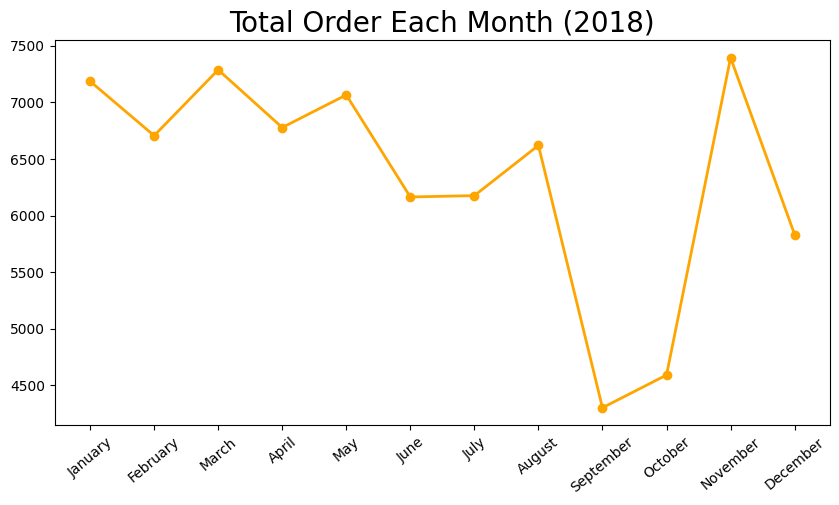

In [124]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_orders_df['order_approved_at'],
    monthly_orders_df['order_count'],
    marker='o',
    linewidth=2,
    linestyle='-',
    color='orange',
    label='Order Count'
)
plt.title("Total Order Each Month (2018)", loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation = 40)
plt.yticks(fontsize=10)
plt.show()

In [112]:
monthly_income_df = monthly_orders_df.sort_values('revenue').drop_duplicates('order_approved_at', keep = 'last')
monthly_income_df.head()

,order_approved_at,order_count,revenue,month_number
12,September,4301,927821.13,9
15,December,5832,1092932.59,12
13,October,4590,1138730.07,10
23,August,6620,1268960.54,8
21,June,6164,1306785.03,6


In [113]:
monthly_income_df = monthly_orders_df.sort_values("month_number")
monthly_income_df.sort_values(by='month_number', ascending = True)

,order_approved_at,order_count,revenue,month_number
16,January,7187,1406557.66,1
17,February,6706,1314882.87,2
18,March,7288,1500474.01,3
19,April,6778,1476502.25,4
20,May,7066,1545868.81,5
21,June,6164,1306785.03,6
22,July,6176,1334156.42,7
23,August,6620,1268960.54,8
12,September,4301,927821.13,9
13,October,4590,1138730.07,10


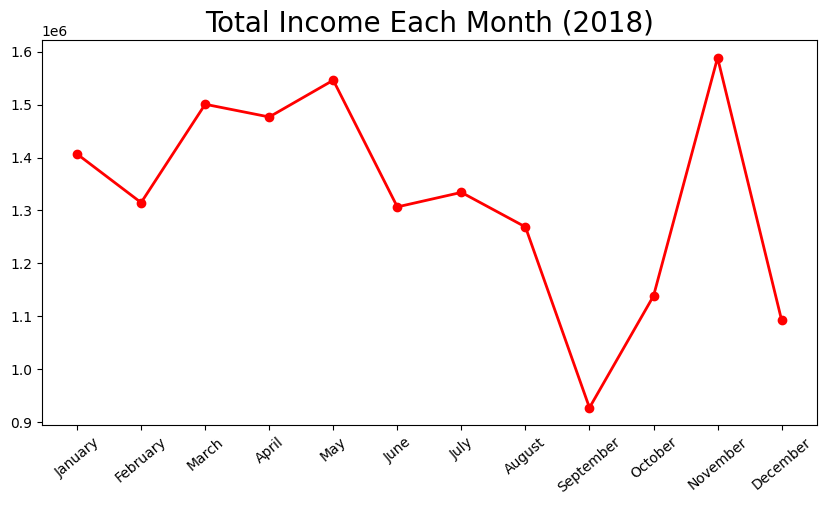

In [125]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_income_df['order_approved_at'],
    monthly_income_df['revenue'],
    marker='o',
    linewidth=2,
    linestyle='-',
    color='Red',
    label='Order Count'
)
plt.title("Total Income Each Month (2018)", loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation = 40)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 4: Bagaimana tingkat kepuasan pelanggan terhadap pelayanan e-commerce?

In [115]:
review_rating =  all_df['review_score'].value_counts().sort_values(ascending= False)
review_rating

5.0    66343
4.0    22319
1.0    15425
3.0     9894
2.0     4162
Name: review_score, dtype: int64

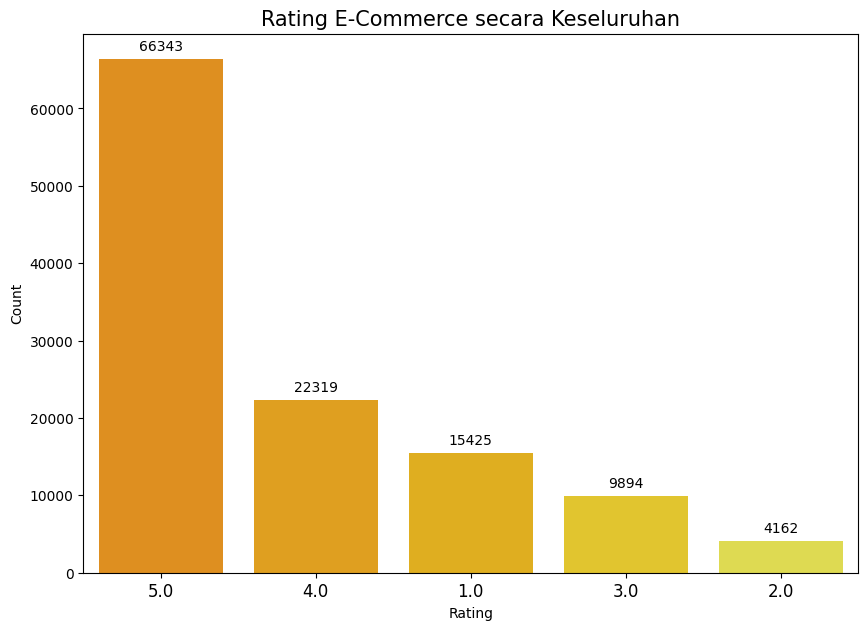

In [116]:
plt.figure(figsize=(10,7))
review = sns.barplot(x = review_rating.index,
                 y = review_rating.values,
                 order = review_rating.index,
                 palette = 'Wistia_r' )
plt.title('Rating E-Commerce secara Keseluruhan', fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)

for p in review.patches:
    review.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

plt.show()

In [117]:
average_review_by_category = all_df.groupby('product_category_name')['review_score'].mean().reset_index()
sorted_categories = average_review_by_category.sort_values(by='review_score', ascending=False)

print("Rata-rata Review Penilaian per Kategori Produk:")
print(sorted_categories)

Rata-rata Review Penilaian per Kategori Produk:
                            product_category_name  review_score
17                              cds_dvds_musicais      4.642857
37                  fashion_roupa_infanto_juvenil      4.500000
48                         livros_interesse_geral      4.438503
41                                         flores      4.419355
47                              livros_importados      4.419355
..                                            ...           ...
55                              moveis_escritorio      3.526791
65  portateis_cozinha_e_preparadores_de_alimentos      3.266667
42                                fraldas_higiene      3.256410
60                                       pc_gamer      3.100000
67                             seguros_e_servicos      2.500000

[73 rows x 2 columns]


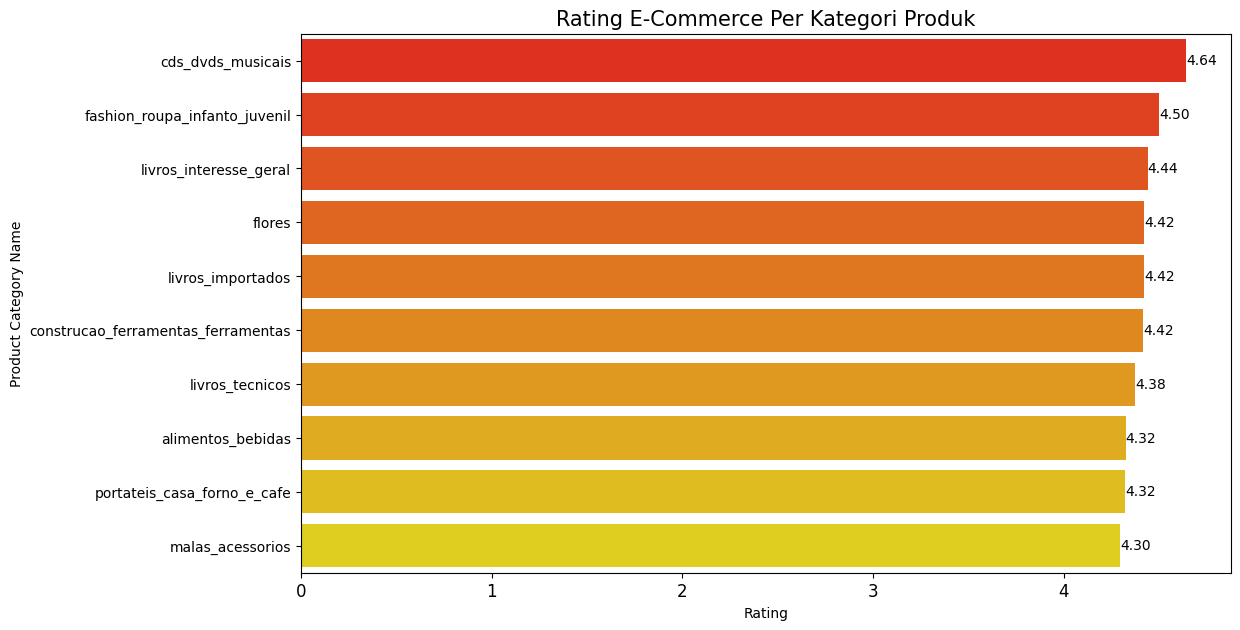

In [118]:
plt.figure(figsize=(12,7))
review = sns.barplot(x='review_score',
                     y='product_category_name',
                     data=sorted_categories.head(10),
                     palette='autumn')
plt.title('Rating E-Commerce Per Kategori Produk', fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Product Category Name")
plt.xticks(fontsize=12)

for p in review.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2., f'{width:.02f}', ha="left", va="center", fontsize=10)

plt.show()


### Pertanyaan 5: Metode pembayaran apa yang paling umum digunakan dalam transaksi pada E-commerce?

In [119]:
payment_type_count = all_df['payment_type'].value_counts().sort_values(ascending= False)
payment_type_count

credit_card    87776
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
Name: payment_type, dtype: int64

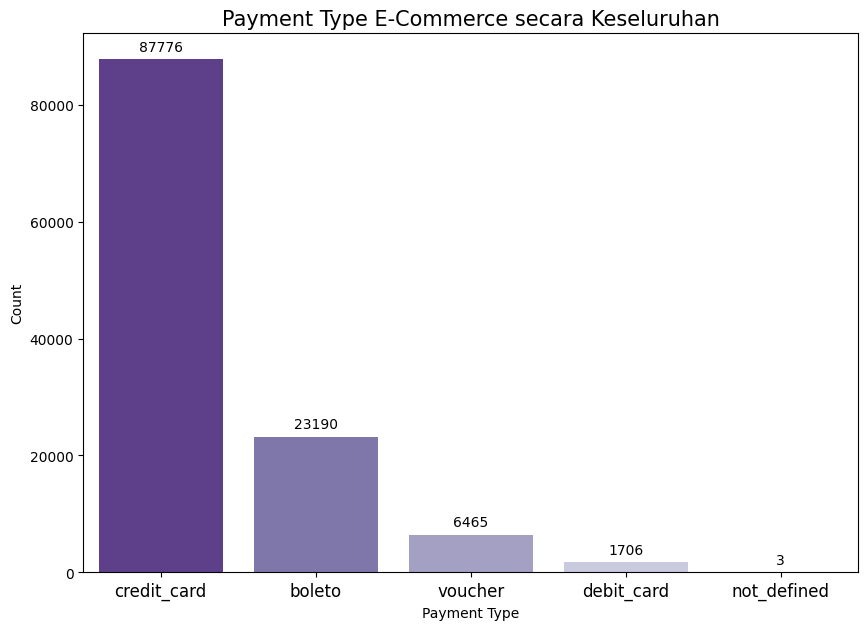

In [120]:
plt.figure(figsize=(10,7))
py = sns.barplot(x = payment_type_count.index,
                 y = payment_type_count.values,
                 order = payment_type_count.index,
                 palette = 'Purples_r' )
plt.title('Payment Type E-Commerce secara Keseluruhan', fontsize=15)
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.xticks(fontsize=12)

for p in py.patches:
    py.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

plt.show()

## Conclusion

1. Kategori produk apa yang paling laris dan paling sedikit terjual?

  > Berdasarkan hasil analisis yang telah saya lakukan, dapat disimpulkan bahwa produk yang paling laris terjual adalah produk dengan kategori **'bed_bath_table'** sedangkan produk yang paling sedikit terjual adalah produk dengan kategori **'security_and_service'**

2.  Dari mana asal kota dan negara pelanggan teratas dari segi total pengeluaran dan pesanan terbanyak?

  > Berdasarkan hasil analisis yang telah dilakukan, dapat terlihat bahwa asal kota pelanggan dengan total pengeluaran terbanyak dan pesanan terbanyak adalah kota **'Sao Paulo'**. Kemudian asal negara pelanggan dengan pesanan dan penghasilan terbanyak bagi perusahaan adalah **'SP'** dengan total 41.666 pesanan dan pengeluaran sebesar 7.711.911.
  Sedangkan asal negara pelanggan dengan pesanan dan pengeluaran paling sedikit pada e-commerce adalah **'RR'** dengan total 46 pesanan dengan jumlah transaksi sebesar 12.462.

3. Bagaimana performa penjualan dan revenue perusahaan seiring berjalan waktu?
  > Berdasarkan hasil analisis performa penjualan perusahaan, dapat disimpulkan bahwa penjualan produk pada E-commerce dalam periode Januari-Mei cenderung stabil. Namun terjadi penurunan yang signifikan pada periode Agustus-September dan periode November-Desember dan terjadi kenaikan yang signifikan kembali pada periode Oktober-November. Hal ini membuktikan bahwa perusahaan dapat mengatasi permasalahan dengan tepat karena setelah mengalami penurunan yang signifikan setelah itu terjadi kenaikan penjualan yang signifikan juga. Hasil ini dapat dimanfaatkan untuk menganalisi mengapa terjadinya penurunan yang sangat signifikan dan bagaimana keputusan terbaik yang dapat diambil dengan melakukan analisa lebih dalam.



4. Bagaimana tingkat kepuasan pelanggan terhadap pelayanan e-commerce?
  > Berdasarkan hasil analisis, dapat dilihat bahwa secara keseluruhan rating pada E-commerce memiliki penilaian yang sangat baik karena rating tertinggi adalah rating 5 dengan total 66.292 dari 118.143 penilaian. Hal ini membuktikan bahwa pelayanan E-commerce sudah baik dengan memperoleh rating tertinggi lebih dari 50%, namun hal ini akan lebih baik jika dapat ditingkatkan lagi. Selain itu, dari hasil visualisasi dapat dilihat bahwa best rating product adalah **'cds_dvds_musicais'** dengan rata-rata penilaian sebesar 4.64/5.

5. Metode pembayaran apa yang paling umum digunakan dalam transaksi pada E-commerce?
  > Berdasarkan hasil analisis, dapat disimpulkan bahwa metode pembayaran yang paling banyak digunakan pada E-commerce adalah menggunakan **credit_card**. Hal ini dapat dimanfaatkan oleh perusahaan untuk dapat menyediakan metode tersebut lebih banyak tersedia di berbagai kota dan negara melihat banyaknya penggunaan credit card tersebut.






